In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import joblib

# Segmentação por cores com K-Means


## Usando múltiplas imagens

In [2]:
# read images
# flattenning
# stacking

# em progresso
# segmented_img = kmeans.cluster_centers_[kmeans.labels_[:X.shape[0]]]

In [3]:
# Cria listas com as imagens e seu reshape
path = '../images/clear_images/'
images = []
reshaped_images = []
with open('../images/separated_labels/clear.csv') as file:
    lines = file.readlines()
    for index, line in enumerate(lines):
        image_path = path + line.split(',')[0] + '.jpg'
        image = mpl.image.imread(image_path)
        images.append(image)
        reshaped_images.append(image.reshape(-1,4))
        if index == 10000:
            break


In [4]:
reshaped_images[0]

array([[ 47,  61,  55, 255],
       [ 51,  63,  56, 255],
       [ 56,  67,  59, 255],
       ...,
       [ 86,  92,  74, 255],
       [ 93,  97,  80, 255],
       [ 99, 101,  84, 255]], dtype=uint8)

In [5]:
combined_pixels = np.vstack(reshaped_images)

In [6]:
# Treinando o modelo
# kmeans = KMeans(n_clusters=5, n_init=10)
# kmeans.fit(combined_pixels)

KMeans(n_clusters=5, n_init=10)

In [57]:
# Salvando o modelo
# import joblib
# joblib.dump(kmeans, 'kmeans_model.pkl')

In [55]:
# Carregando o modelo salvo
kmeans = joblib.load('kmeans_model.pkl')

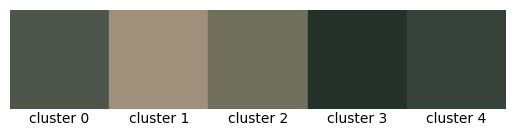

In [56]:
labels = set(kmeans.labels_)

# Plotting
fig, ax = plt.subplots()

# Plot de quadrados com a cor de cada cluster
for label, center in zip(labels, kmeans.cluster_centers_):
    color = [c / 255. for c in center[:3]]  # Normaliza os valores entre [0,1]
    square = plt.Rectangle((label * 100, 0), 100, 100, color=color)
    ax.add_patch(square)

    subtitle = f'cluster {label}' # Concatenate RGB values
    ax.text(label * 100 + 50, -10, subtitle, ha='center', va='center', color='black')

# Set plot limits and aspect
ax.set_xlim(0, len(labels) * 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal', 'box')

# Remove axes
ax.axis('off')

plt.show()

In [ ]:
def predict_image(image, model):

Original image shape: (256, 256, 4)
Reshaped image array shape: (65536, 4)
Predicted clusters shape: (65536,)


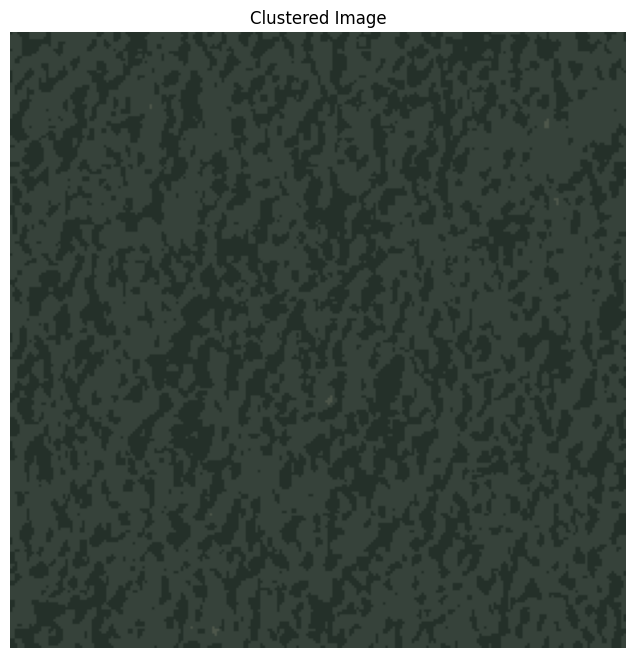

In [53]:
image_array = mpl.image.imread('../images/clear_images/train_2.jpg')
# Check the shape of the image array
print("Original image shape:", image_array.shape)  # Should be (height, width, 4)

# Reshape the image array to a 2D array where each row is a pixel (R, G, B, A)
pixels = image_array.reshape(-1, 4)
print("Reshaped image array shape:", pixels.shape)  # Should be (num_pixels, 4)

# Predict the cluster for each pixel
predicted_clusters = kmeans.predict(pixels)
print("Predicted clusters shape:", predicted_clusters.shape)  # Should be (num_pixels,)

# Map clusters back to the cluster center colors for visualization
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create an array with the same shape as the original image but with cluster center colors
clustered_pixels = cluster_centers[predicted_clusters]

# Reshape back to the original image shape
clustered_image_array = clustered_pixels.reshape(image_array.shape).astype(np.uint8)

# Display the clustered image using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(clustered_image_array)
plt.axis('off')  # Hide the axes
plt.title('Clustered Image')
plt.show()